<h1 style = color:Green> Merging and Concatenating Data </h1>

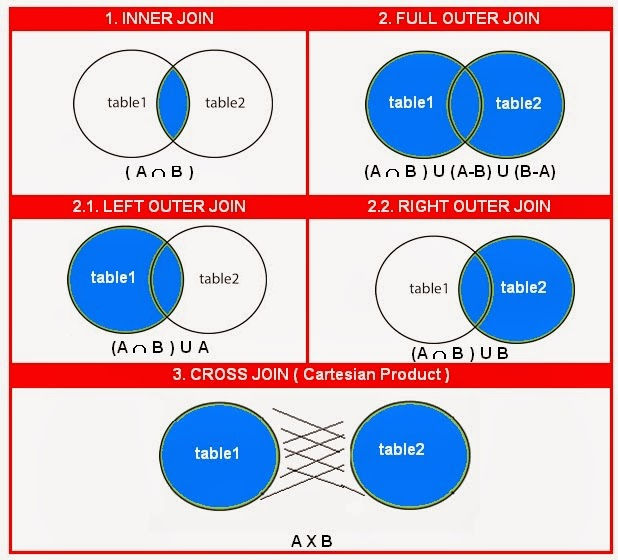

In [3]:
import pandas as pd

bios = pd.read_csv(r'https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/master/data/bios.csv') 
nocs = pd.read_csv(r'https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/master/data/noc_regions.csv')

<h2 style="font-size: 20px; color: yellow;">Merging:</h2>

In [26]:
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left')
bios_new.head(3)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,NOC_y,region,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,FRA,France,NaN


In [32]:
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True)

bios_new[:][['name', 'born_country', 'born_country_full']]

,name,born_country,born_country_full
0,Jean-François Blanchy,FRA,France
1,Arnaud Boetsch,FRA,France
2,Jean Borotra,FRA,France
3,Jacques Brugnon,FRA,France
4,Albert Canet,GBR,UK
...,...,...,...
145495,Polina Luchnikova,RUS,Russia
145496,Valeriya Merkusheva,RUS,Russia
145497,Yuliya Smirnova,RUS,Russia
145498,André Foussard,FRA,France


In [ ]:
usa = bios[bios['born_country'] == 'USA'].copy()
gbr = bios[bios['born_country'] == 'GBR'].copy()
usa.head()

<h2 style="font-size: 20px; color: yellow;">Concatenating:</h2>

In [40]:
concatenated_df = pd.concat([usa, gbr])

In [48]:
concatenated_df.sample(5)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
2225,2235,Butch Johnson,1955-08-30,Worcester,Massachusetts,USA,United States,191.0,98.0,NaN
77215,77806,Cheryl Dickey,1966-12-12,Houston,Texas,USA,United States,165.0,62.0,NaN
29044,29258,Jenifer Lovell,1974-02-01,Miami,Florida,USA,United States,172.0,49.0,NaN
18609,18736,John Cockett,1927-12-23,Broadstairs,England,GBR,Great Britain,NaN,NaN,2020-02-15
11042,11101,John Holland,1952-08-18,Sacramento,California,USA,United States,183.0,80.0,NaN


<h1 style = color:Green>Handling Null Values</h1>

In [4]:
coffee = pd.read_csv(r'D:\Python\Pandas\coffee.csv')

In [5]:
import numpy as np

In [74]:
# inserting NaN
coffee.loc[[2, 3], 'Units Sold'] = np.nan

In [75]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25.0
1,Monday,Latte,15.0
2,Tuesday,Espresso,NaN
3,Tuesday,Latte,NaN
4,Wednesday,Espresso,35.0


<h2 style="font-size: 20px; color: yellow;">Using mean():</h2>

In [63]:
# mean() takes the mean of the whole column and inserts that value in place of NaN
coffee.fillna(coffee['Units Sold'].mean())

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25.000000
1,Monday,Latte,15.000000
2,Tuesday,Espresso,34.166667
3,Tuesday,Latte,34.166667
4,Wednesday,Espresso,35.000000
5,Wednesday,Latte,25.000000
6,Thursday,Espresso,40.000000
7,Thursday,Latte,30.000000
8,Friday,Espresso,45.000000
9,Friday,Latte,35.000000


<h2 style="font-size: 20px; color: yellow;">Using interpolate():</h2>

In [76]:
# inserting NaN again
coffee.loc[[2, 3], 'Units Sold'] = np.nan

In [78]:
# interpolate uses neighbouring values and generates a value which lies between them
coffee['Units Sold'] = coffee['Units Sold'].interpolate()

In [80]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25.000000
1,Monday,Latte,15.000000
2,Tuesday,Espresso,21.666667
3,Tuesday,Latte,28.333333
4,Wednesday,Espresso,35.000000


<h2 style="font-size: 20px; color: yellow;">Dropping the rows which contain NaN:</h2>

In [81]:
coffee.dropna(subset=['Units Sold'])
# using a subset means that if NaN exists in any column other than the one mentioned in subset, that row wont be dropped.

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25.000000
1,Monday,Latte,15.000000
2,Tuesday,Espresso,21.666667
3,Tuesday,Latte,28.333333
4,Wednesday,Espresso,35.000000
5,Wednesday,Latte,25.000000
6,Thursday,Espresso,40.000000
7,Thursday,Latte,30.000000
8,Friday,Espresso,45.000000
9,Friday,Latte,35.000000


<h2 style="font-size: 20px; color: yellow;">Accessing rows which have NA:</h2>

In [84]:
# inserting NaN again
coffee.loc[[2, 3], 'Units Sold'] = np.nan

In [85]:
coffee[coffee['Units Sold'].notna()]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25.0
1,Monday,Latte,15.0
4,Wednesday,Espresso,35.0
5,Wednesday,Latte,25.0
6,Thursday,Espresso,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,Latte,35.0
10,Saturday,Espresso,45.0
11,Saturday,Latte,35.0


In [86]:
coffee[coffee['Units Sold'].isna()]

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,NaN
3,Tuesday,Latte,NaN


<h1 style = color:Green>Aggregating Data</h1>

<h2 style="font-size: 20px; color: yellow;">Pivoting Data:</h2>

In [7]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [9]:
# ADDING PRICE AND REVENUE COLUMNS
coffee['Price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99)
coffee['Revenue'] = coffee['Price'] * coffee['Units Sold']

In [10]:
pivot_coffee = coffee.pivot(columns='Coffee Type', index='Day', values='Revenue')

In [13]:
pivot_coffee

Coffee Type,Espresso,Latte
Day,,
Friday,179.55,209.65
Monday,99.75,89.85
Saturday,179.55,209.65
Sunday,179.55,209.65
Thursday,159.60,179.70
Tuesday,119.70,119.80
Wednesday,139.65,149.75


In [18]:
# ACCESSING LATTE AND ESPRESSO REVENUE FROM MONDAYS
pivot_coffee.loc['Monday', ['Latte', 'Espresso']]

Coffee Type
Latte       89.85
Espresso    99.75
Name: Monday, dtype: float64

In [24]:
# ACCESSING THE TOTAL REVENUE FOR EACH COFFEE TYPE
pivot_coffee.sum(axis=0)

Coffee Type
Espresso    1057.35
Latte       1168.05
dtype: float64

In [23]:
# ACCESSING THE TOTAL REVENUES FOR EACH DAY
pivot_coffee.sum(axis=1)

Day
Friday       389.2
Monday       189.6
Saturday     389.2
Sunday       389.2
Thursday     339.3
Tuesday      239.5
Wednesday    289.4
dtype: float64

<h2 style="font-size: 20px; color: yellow;">Using groupby():</h2>

In [31]:
bios['born_date'] = pd.to_datetime(bios['born_date'])
bios['born_month'] = bios['born_date'].dt.month
bios['born_year'] = bios['born_date'].dt.year

bios.groupby([bios['born_year'], bios['born_month']])['name'].count().reset_index()


,born_year,born_month,name
0,1828.0,10.0,1
1,1831.0,2.0,2
2,1833.0,1.0,1
3,1836.0,3.0,1
4,1837.0,12.0,1
...,...,...,...
1880,2007.0,8.0,1
1881,2008.0,1.0,1
1882,2008.0,7.0,1
1883,2008.0,8.0,1


<h1 style = color:Green>Advanced Functionality</h1>

<h2 style="font-size: 20px; color: yellow;">Using shift():</h2>

In [35]:
coffee['Yesterday Revenue'] = coffee['Revenue'].shift(2)

coffee

,Day,Coffee Type,Units Sold,Price,Revenue,Yesterday Revenue
0,Monday,Espresso,25,3.99,99.75,NaN
1,Monday,Latte,15,5.99,89.85,NaN
2,Tuesday,Espresso,30,3.99,119.70,99.75
3,Tuesday,Latte,20,5.99,119.80,89.85
4,Wednesday,Espresso,35,3.99,139.65,119.70
5,Wednesday,Latte,25,5.99,149.75,119.80
6,Thursday,Espresso,40,3.99,159.60,139.65
7,Thursday,Latte,30,5.99,179.70,149.75
8,Friday,Espresso,45,3.99,179.55,159.60
9,Friday,Latte,35,5.99,209.65,179.70


In [37]:
coffee['Percentage Change'] = (coffee['Revenue'] / coffee['Yesterday Revenue']) * 100 

coffee

,Day,Coffee Type,Units Sold,Price,Revenue,Yesterday Revenue,Percentage Change
0,Monday,Espresso,25,3.99,99.75,NaN,NaN
1,Monday,Latte,15,5.99,89.85,NaN,NaN
2,Tuesday,Espresso,30,3.99,119.70,99.75,120.000000
3,Tuesday,Latte,20,5.99,119.80,89.85,133.333333
4,Wednesday,Espresso,35,3.99,139.65,119.70,116.666667
5,Wednesday,Latte,25,5.99,149.75,119.80,125.000000
6,Thursday,Espresso,40,3.99,159.60,139.65,114.285714
7,Thursday,Latte,30,5.99,179.70,149.75,120.000000
8,Friday,Espresso,45,3.99,179.55,159.60,112.500000
9,Friday,Latte,35,5.99,209.65,179.70,116.666667


<h2 style="font-size: 20px; color: yellow;">Using cumsum():</h2>

In [41]:
coffee['Cumulative Revenue'] = coffee['Revenue'].cumsum()

coffee[['Coffee Type', 'Day', 'Revenue', 'Cumulative Revenue']]

,Coffee Type,Day,Revenue,Cumulative Revenue
0,Espresso,Monday,99.75,99.75
1,Latte,Monday,89.85,189.60
2,Espresso,Tuesday,119.70,309.30
3,Latte,Tuesday,119.80,429.10
4,Espresso,Wednesday,139.65,568.75
5,Latte,Wednesday,149.75,718.50
6,Espresso,Thursday,159.60,878.10
7,Latte,Thursday,179.70,1057.80
8,Espresso,Friday,179.55,1237.35
9,Latte,Friday,209.65,1447.00


<h2 style="font-size: 20px; color: yellow;">Using rolling():</h2>

In [45]:
latte = coffee[coffee['Coffee Type'] == 'Latte'].copy()

In [48]:
latte['Past_3Day_Sum'] = latte['Units Sold'].rolling(3).sum()
latte

,Day,Coffee Type,Units Sold,Price,Revenue,Yesterday Revenue,Percentage Change,Cumulative Revenue,Past_3Day_Sum
1,Monday,Latte,15,5.99,89.85,NaN,NaN,189.6,NaN
3,Tuesday,Latte,20,5.99,119.80,89.85,133.333333,429.1,NaN
5,Wednesday,Latte,25,5.99,149.75,119.80,125.000000,718.5,60.0
7,Thursday,Latte,30,5.99,179.70,149.75,120.000000,1057.8,75.0
9,Friday,Latte,35,5.99,209.65,179.70,116.666667,1447.0,90.0
11,Saturday,Latte,35,5.99,209.65,209.65,100.000000,1836.2,100.0
13,Sunday,Latte,35,5.99,209.65,209.65,100.000000,2225.4,105.0


<h1 style = color:Green>New Functionality</h1>

In [52]:
results_numpy = pd.read_csv(r'D:\Python\Pandas\results.csv')
results_arrow = pd.read_csv(r'D:\Python\Pandas\results.csv', engine='pyarrow', dtype_backend='pyarrow')

In [54]:
print(results_numpy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB
None


In [55]:
print(results_arrow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        305807 non-null  double[pyarrow]
 1   type        305807 non-null  string[pyarrow]
 2   discipline  308407 non-null  string[pyarrow]
 3   event       308408 non-null  string[pyarrow]
 4   as          308408 non-null  string[pyarrow]
 5   athlete_id  308408 non-null  int64[pyarrow] 
 6   noc         308407 non-null  string[pyarrow]
 7   team        121714 non-null  string[pyarrow]
 8   place       283193 non-null  double[pyarrow]
 9   tied        308408 non-null  bool[pyarrow]  
 10  medal       44139 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 37.5 MB
None


In [1]:
import pandas as pd

In [4]:
bios = pd.read_csv(r'D:\Python\Pandas\bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [14]:
bios.name.reset_index()

,index,name
0,0,Jean-François Blanchy
1,1,Arnaud Boetsch
2,2,Jean Borotra
3,3,Jacques Brugnon
4,4,Albert Canet
...,...,...
145495,145495,Polina Luchnikova
145496,145496,Valeriya Merkusheva
145497,145497,Yuliya Smirnova
145498,145498,André Foussard
